<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'
# Abrindo o arquivo para leitura:
with open(NOME_ARQUIVO_FONTE, 'r') as arquivo:
	arquivo_xml = arquivo.read() 

# Lendo o arquivo do formato xml:
fonte = BeautifulSoup(arquivo_xml, 'lxml')

In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados
dados = fonte.find_all('estado')
estados = list()#lista para adicionar as informações noem, sigla e região 

# continue o codigo aqui
# Loop para coletar as informações do nome, sigla e região de cada Estado (UF):
for dado in dados:
  estado = dado.find('nome').get_text().strip()
  sigla = dado.find('sigla').get_text().strip()
  regiao = dado.find('regiao').get_text().strip()
  estados.append([estado, sigla, regiao])
  


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui
import csv

# salvando as informações no arquivo estados-limpo.csv :
with open(file=NOME_ARQUIVO_DESTINO, mode='w', encoding='utf8') as arquivo:
  arquivo_csv = csv.writer(arquivo, delimiter=';')
  arquivo_csv.writerow(['estado','sigla','regiao'])
  arquivo_csv.writerows(estados)

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = 'utf-8' # continue o codigo aqui

df_cidades = pd.read_csv(filepath_or_buffer=NOME_ARQUIVO_FONTE, 
                         sep=',', 
                         decimal = '.', 
                         encoding=fonte,  
                         usecols=['UF', 'Censo','nome','PIB', 'Pop_est_2009', 'PIB_percapita'])


In [6]:
# visualize os resultados
display(df_cidades.head())
# continue o codigo aqui
#Selecionando apenas as informações do Censo 2010 no DataFrame, conforme ponto 1:
df_cidades = df_cidades.query('Censo == 2010')

,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000


In [7]:
# manipule os dados

# continue o codigo aqui

# Selecionando as colunas solicitadas no ponto 2:
df_cidades = df_cidades[['UF','nome','PIB', 'Pop_est_2009', 'PIB_percapita']]

In [8]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

#Salvando o dataframe no arquivo cidades-limpo.csv:
df_cidades.to_csv(path_or_buf=NOME_ARQUIVO_DESTINO,sep=';',index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [9]:
# solução do exercício 1.3
# primeiro criar o arquivo estados-bruto.csv:
# Abrindo o arquivo para leitura:
with open(file='estados-bruto.xml', mode='r') as arquivo:
	arquivo_xml = arquivo.read() 

# Lendo o arquivo do formato xml:
fonte = BeautifulSoup(arquivo_xml, 'lxml')

# Lista para salvar os elementos:
elementos = list()

# Loop responsável por selecionando os elementos da fonte 'xml' 
# e salvando na lista de elementos:
for dado in fonte.find_all('estado'):
  id = dado.find('id').get_text().strip()#selecionamento o elemento id
  nome = dado.find('nome').get_text().strip()
  id_capital = dado.find('idcapital').get_text().strip()
  sigla = dado.find('sigla').get_text().strip()
  regiao = dado.find('regiao').get_text().strip()

  # Salvado as informações na lista:
  elementos.append([id, nome, id_capital, sigla, regiao])

# salvando as informações no arquivo estados-bruto.csv :
with open(file='./estado-bruto.csv', mode='w', encoding='utf8') as arquivo:
  arquivo_csv = csv.writer(arquivo, delimiter=',')
  arquivo_csv.writerow(['id','nome','id_capital', 'sigla', 'regiao'])
  arquivo_csv.writerows(elementos)
  
# Criando o DataFrame do arquivo estado-bruto.csv:
df_estado_bruto = pd.read_csv(filepath_or_buffer='estado-bruto.csv', 
                         sep=',',  
                         encoding='utf-8')

#Criando o DataFrame do arquivo cidades-bruto.csv
df_cidades_bruto = pd.read_csv(filepath_or_buffer='cidades-bruto.csv', 
                         sep=',', 
                         decimal = '.', 
                         encoding='utf-8')

In [10]:
# Renomeando a coluna nome para UF, para evitar conflito de variáveis (colunas)
# com a junção dos DataFrames estados_brutos e cidades_bruto:
df_estado_bruto.rename(columns={'nome':'UF'}, inplace=True)
df_estado_bruto.columns #confirmando que a modificação foi realizada

# Organizando a informação da variável UF e colocando o acento em São Paulo:
df_estado_bruto['UF'] = df_estado_bruto.UF.str.replace('SAO', 'SÃO')

In [11]:
# Fazendo a junção de dois DataFremes pelo método de merge (inner join - elementos em comum):
df = pd.merge(left=df_estado_bruto, right=df_cidades_bruto, on='UF', how='inner')


In [12]:
# Confirmando se ainda resta números núlos, ou faltosos:
print(df.isnull().sum(), end='\n\n')
print(df.isna().sum())

id               0
UF               0
id_capital       0
sigla            0
regiao           0
FID              0
gid              0
nome             1
Censo            6
PIB              0
Pop_est_2009     0
PIB_percapita    0
Descrição        0
legenda          0
classe           0
geom             0
dtype: int64

id               0
UF               0
id_capital       0
sigla            0
regiao           0
FID              0
gid              0
nome             1
Censo            6
PIB              0
Pop_est_2009     0
PIB_percapita    0
Descrição        0
legenda          0
classe           0
geom             0
dtype: int64


In [13]:
# Eliminando elementos nulos das colunas "nome" e "Censo":
df.dropna(subset = ['nome','Censo'], inplace=True)

In [14]:
#Salvando o dataframe no arquivo brasil.csv:
df.to_csv(path_or_buf='./brasil.csv',sep=';',index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [15]:
# solução do exercício 2.1

# Carregando o DataFrame:
brasil_df =  pd.read_csv(filepath_or_buffer='brasil.csv', 
                         sep=';', 
                         decimal = '.', 
                         encoding='utf-8')

### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [16]:
# código para responder a pergunta

# Selecionando as variáveis "nome", "pop_est_2009":
top_10_cidades_populasas = brasil_df[['nome','Pop_est_2009']]
# Agrupando as informações pelo "nome" das cidades e fazer o somatório 
# da população estimada:
top_10_cidades_populasas = top_10_cidades_populasas.groupby('nome').sum()
# Restando o index para melhorar a visualização das informações no Pandas:
top_10_cidades_populasas.reset_index(inplace=True)
# Ordenando as informações por ordem decrescente da pupalação estimada:
top_10_cidades_populasas.sort_values(by='Pop_est_2009', ascending=False, ignore_index=True, inplace=True)
# Renomenado o nome das colunas e selecionando as 10 primeiras linhas do DataFrame:
top_10_cidades_populasas = top_10_cidades_populasas.rename(columns={'nome':'Cidade','Pop_est_2009':'Populacao'}).head(10)
top_10_cidades_populasas #exibindo o resultado


,Cidade,Populacao
0,São Paulo,11037593
1,Rio de Janeiro,6186710
2,Salvador,2998056
3,Brasília,2606885
4,Belo Horizonte,2452617
5,Manaus,1738641
6,Recife,1561659
7,Porto Alegre,1436123
8,Guarulhos,1299283
9,Campinas,1064669


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [17]:
# código para responder a pergunta


# Consultado as informações referênte a região Nordeste:
top_down_city_pib = brasil_df.query('regiao == "NORDESTE"')

# Selecionando as colunas "nome" e "PIB":
top_down_city_pib = top_down_city_pib[['nome','PIB']]

# Agrupa as informações pelo nome das cidades e realizando o somatório dos 
# respectivos PIB:
top_down_city_pib = top_down_city_pib.groupby('nome').sum()

# Ordenando as informações para exibir em ordem descrecente do PIB:
top_down_city_pib.sort_values(by='PIB', inplace=True)

# Resentando o index para melhorar sua visualização no Pandas:
top_down_city_pib.reset_index(inplace=True)

# Renomeando a coluna "nome" para "Cidade" e selecionando as 5 primeiras linhas:
top_down_city_pib = top_down_city_pib.rename(columns={'nome':'Cidade'}).head(5)
top_down_city_pib#Exibindo o resultado

,Cidade,PIB
0,João Dias,11670.412109
1,Monte das Gameleiras,11909.322266
2,Taboleiro Grande,12153.434570
3,Pedra Preta,12639.967773
4,Jardim de Angicos,12700.251953


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [18]:
# código para responder a pergunta

# Consultando a informação referente ao estado de São Paulo:
sp_rank = brasil_df.query('UF == "SÃO PAULO"')
# Selecionando as variáveis "nome" e "PIB":
sp_rank = sp_rank[['nome', 'PIB']]
#Agrupando as informações pelo nome das cidades e fazer o somatório dos 
# respectivos PIB:
sp_rank = sp_rank.groupby('nome').sum()
# Resetando o index para melhorar a visualização no Pandas:
sp_rank.reset_index(inplace=True)
# Renomeando o nome da coluna "nome" para "Cidades":
sp_rank = sp_rank.rename(columns={'nome':'Cidades'})
# Ordenando as informações para exibir em ordem descrecente do PIB:
sp_rank = sp_rank.sort_values(by='PIB', ascending=False, ignore_index=True)
sp_rank#Exibindo o resultado

,Cidades,PIB
0,São Paulo,3.893172e+08
1,Guarulhos,3.247383e+07
2,Campinas,3.165472e+07
3,Osasco,3.161645e+07
4,São Bernardo do Campo,2.893577e+07
...,...,...
638,Torre de Pedra,1.793201e+04
639,Pracinha,1.783034e+04
640,Vitória Brasil,1.744689e+04
641,Fernão,1.591925e+04


 - Qual é o PIB do estado de Santa Catarina?

In [19]:
# código para responder a pergunta

# Consultando a informação referente ao estado de Santa Cataria:
pib_sc = brasil_df.query('UF == "SANTA CATARINA"')
# Selecionando a coluna "PIB" e aplicação o método de agregação para soma:
pib_sc = pib_sc['PIB'].agg('sum')
print(f'PIB de Santa Cataria: R$ {pib_sc:,.2f}')#Exibindo o resultado

PIB de Santa Cataria: R$ 129,806,256.75


 - Qual é o população da região sul?

In [20]:
# código para responder a pergunta

# Primeiro consultar a informação da região sul:
pop_regiao_sul = brasil_df.query('regiao == "SUL"')

# Selecionando as colunas "Pop_est_2009" e aplicando o método de agregração soma:
Pop_est_2009 = pop_regiao_sul['Pop_est_2009'].agg('sum')

Pop_est_2009#exibindo o resultado da pupalação da região sul.

17032871

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [21]:
# código para responder a pergunta

# Consultando as informações do Estado do Mato Grosso do Sul:
ms = brasil_df.query('UF == "MATO GROSSO DO SUL"')

#Consultando o PIB do estado do Mato Grosso do Sul:
ms_pib = ms['PIB']#selecionando a coluna PIB
ms_pib = ms_pib.agg('sum')#utilizando o método de agregação para realizar a soma

# Consultando a população do estado do Mato Grosso do Sul:
ms_pop = ms['Pop_est_2009']#selecionando a coluna da população estimada
ms_pop = ms_pop.agg(sum)#utilizando o método de agregação para realizar a soma

# PIB per capito:
ms_pib_perCapito = ms_pib/ms_pop
# exibindo o resultado:
ms_pib_perCapito


15.406958052058824

 - Qual é a população do Brasil?

In [22]:
# código para responder a pergunta

# Selecionando a coluna população:
pop_brasil = brasil_df['Pop_est_2009']
# utilizando o método de soma:
pop_brasil = pop_brasil.sum()

pop_brasil#exibindo o resultado da população total brasileira.

143319793

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

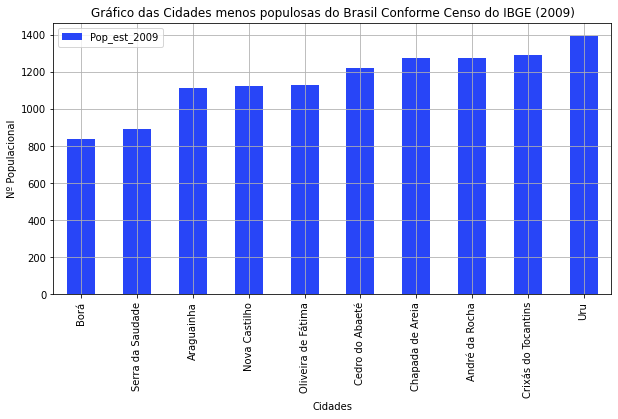

In [23]:
# código para gerar a visualização

# Selecionando as colunas "nome" e "Pop_est_2009":
cid_menos_pop = brasil_df[['nome','Pop_est_2009']]
# Agrupando os dados por nome das cidades e realizando o somatório da população:
cid_menos_pop = cid_menos_pop.groupby('nome').sum()
# Resetando o index para melhorar a visualização e 
cid_menos_pop.reset_index(inplace=True)
# selecionando as 10 primeiras linhas que tem o menor número populacional:
cid_menos_pop = cid_menos_pop.sort_values(by='Pop_est_2009').head(10)


cid_menos_pop.plot(x='nome', y='Pop_est_2009', kind='bar', grid=True, color='#2845F7', figsize=(10,5),
                      title='Gráfico das Cidades menos populosas do Brasil Conforme Censo do IBGE (2009)', ylabel='Nº Populacional', xlabel='Cidades')


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

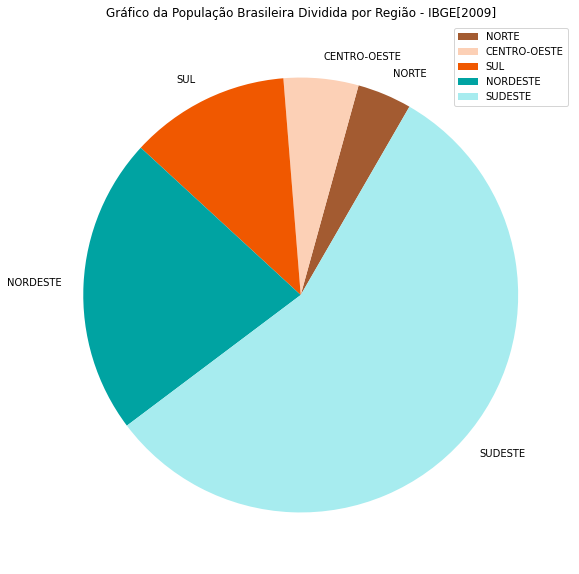

In [28]:
# código para gerar a visualização

# Selecionando as colunas "regiao" e "Pop_est_2009":
pop_regiao = brasil_df[['regiao','Pop_est_2009']]

# Agrupando as informações de regiões do país e fazendo o somatório populacional:
pop_regiao = pop_regiao.groupby('regiao').sum()

# Ordenando as informações em ordem decrescente:
pop_regiao.sort_values(by='Pop_est_2009', inplace=True)

# Exibindo o gráfico de pizza:
pop_regiao.plot(y='Pop_est_2009', kind='pie', startangle=60, ylabel='', 
                colors=['#A35B31','#FCD0B6','#F05800','#00A3A2','#A7ECEF'],
             title='Gráfico da População Brasileira Dividida por Região - IBGE[2009]', 
              explode=(0,0,0,0,0), grid=True, figsize=(10,10), shadow=False, radius=1)
